In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [65]:
np.random.seed(0)

Выберите вариант от 1 до 3

In [74]:
VARIANT = 2

if VARIANT == 1: 
    radius1 = np.random.uniform(0.0, 0.5, 200)  # Радиус от 0 до 0.5
    angle1 = np.random.uniform(0, 2 * np.pi, 200)  # Угол от 0 до 2*pi
    x1 = radius1 * np.cos(angle1)
    y1 = radius1 * np.sin(angle1)


    radius2 = np.random.uniform(0.7, 1.2, 200)  # Радиус от 0.7 до 1.2
    angle2 = np.random.uniform(0, 2 * np.pi, 200)  # Угол от 0 до 2*pi
    x2 = radius2 * np.cos(angle2)
    y2 = radius2 * np.sin(angle2)
    
if VARIANT == 2:
    x1_first = np.random.uniform(0, 5, 100)
    y1_first = np.random.uniform(0, 5, 100)

    x1_last = np.random.uniform(5, 10, 100)
    y1_last = np.random.uniform(5, 10, 100)

    x1 = np.concatenate((x1_first, x1_last))
    y1 = np.concatenate((y1_first, y1_last))


    x2_first = np.random.uniform(0, 5, 100)
    y2_first = np.random.uniform(5, 10, 100)

    x2_last = np.random.uniform(5, 10, 100)
    y2_last = np.random.uniform(0, 5, 100)

    x2 = np.concatenate((x2_first, x2_last))
    y2 = np.concatenate((y2_first, y2_last))
    
if VARIANT == 3:
    x1 = np.random.uniform(0,np.pi, 200)
    y1 = np.sin(x1)
    x1 /= np.pi


    x2 = np.random.uniform(np.pi / 2, 3/2 * np.pi, 200)
    y2 = np.cos(x2)
    x2 /= np.pi  

print(f"Выбран вариант №{VARIANT}")

Выбран вариант №2


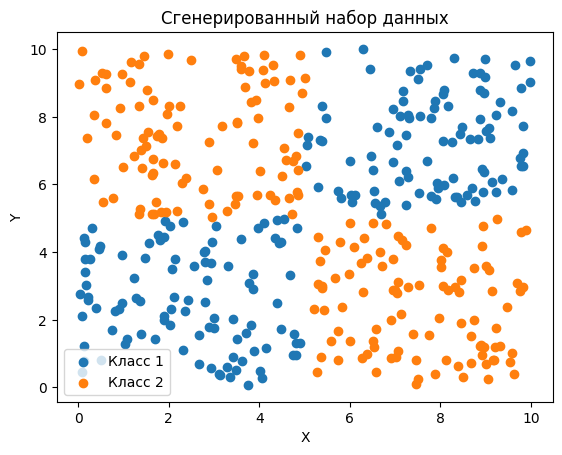

In [75]:
plt.scatter(x1, y1, label='Класс 1')  # Синий для класса 1
plt.scatter(x2, y2, label='Класс 2')  # Красный для класса 2
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Сгенерированный набор данных')
plt.legend()
plt.show()

In [76]:
# Добавление меток класса 
X = np.vstack((np.concatenate((x1, x2)), np.concatenate((y1, y2)))).T
y = np.concatenate((np.zeros(200), np.ones(200)))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 8 
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучаем модель на обучающих данных
knn_model.fit(X_train, y_train)

# Предсказываем метки для тестовых данных
y_pred = knn_model.predict(X_test)

# Оцениваем производительность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

# Выводим отчет о классификации
report = classification_report(y_test, y_pred)
print('Отчет о классификации:\n', report)


Точность модели: 0.96
Отчет о классификации:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        44
         1.0       0.97      0.94      0.96        36

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



Матрица расхождений

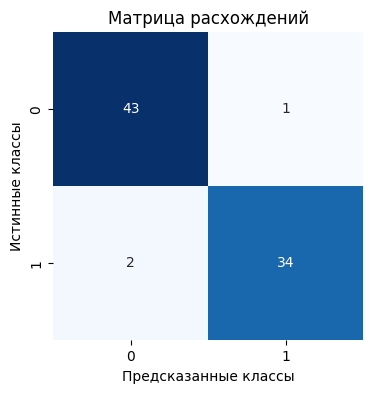

In [77]:
cm = confusion_matrix(y_test, y_pred)

# Визуализируем матрицу расхождений с использованием библиотеки Seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица расхождений')
plt.show()

График точности accuracy(x)

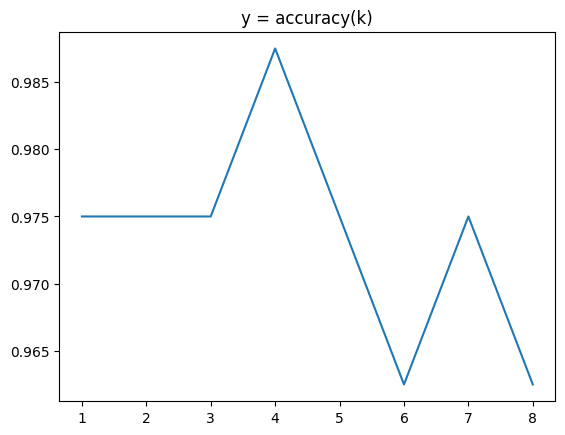

In [78]:
k_arr = np.arange(1, 9)
acc_arr = []
for k in k_arr:
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Обучаем модель на обучающих данных
    knn_model.fit(X_train, y_train)

    # Предсказываем метки для тестовых данных
    y_pred = knn_model.predict(X_test)

    # Оцениваем производительность модели
    accuracy = accuracy_score(y_test, y_pred)
    
    acc_arr.append(accuracy)
    
plt.plot(k_arr, acc_arr)
plt.title('y = accuracy(k)')

plt.show() 